In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("customer_segmentation_data_clean.csv")
df.head()

,minutes_watched,clv,region_western_europe,region_anglosphere,region_rest,channel_facebook,channel_friend,channel_google,channel_instagram,channel_linkedin,channel_other,channel_twitter,channel_youtube
0,3197.0,205.42,0,0,1,0,0,0,0,1,0,0,0
1,63.0,149.99,0,1,0,0,0,1,0,0,0,0,0
2,605.0,119.00,0,0,1,1,0,0,0,0,0,0,0
3,20.0,240.00,0,0,1,0,0,0,0,1,0,0,0
4,245.0,184.36,1,0,0,0,0,0,0,1,0,0,0


# Data Standardization

Prior the hierarchical clustering and k-means, we need to standardize the data. Without it, our results would be unrealible and skewed, specially considering the difference in magnitude regarding minutes watched versus CLV. 

In [4]:
cols_to_std = ["minutes_watched", "clv"]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[cols_to_std])

In [6]:
df_scaled = pd.DataFrame(
    data=df_scaled, 
    columns=cols_to_std
)
df_scaled = pd.concat([df_scaled, df[[col for col in df if col not in cols_to_std]]], axis=1)
df_scaled.head()

,minutes_watched,clv,region_western_europe,region_anglosphere,region_rest,channel_facebook,channel_friend,channel_google,channel_instagram,channel_linkedin,channel_other,channel_twitter,channel_youtube
0,0.240037,1.234976,0,0,1,0,0,0,0,1,0,0,0
1,-0.314844,0.448268,0,1,0,0,0,1,0,0,0,0,0
2,-0.218882,0.008432,0,0,1,1,0,0,0,0,0,0,0
3,-0.322457,1.725764,0,0,1,0,0,0,0,1,0,0,0
4,-0.282621,0.936075,1,0,0,0,0,0,0,1,0,0,0


# Hierarchical clustering

After the data standardization is complete, we can finally utilize clustering the data. Let's start by using the `Ward` method. 

In [7]:
hier_clust = linkage(df_scaled, method='ward')

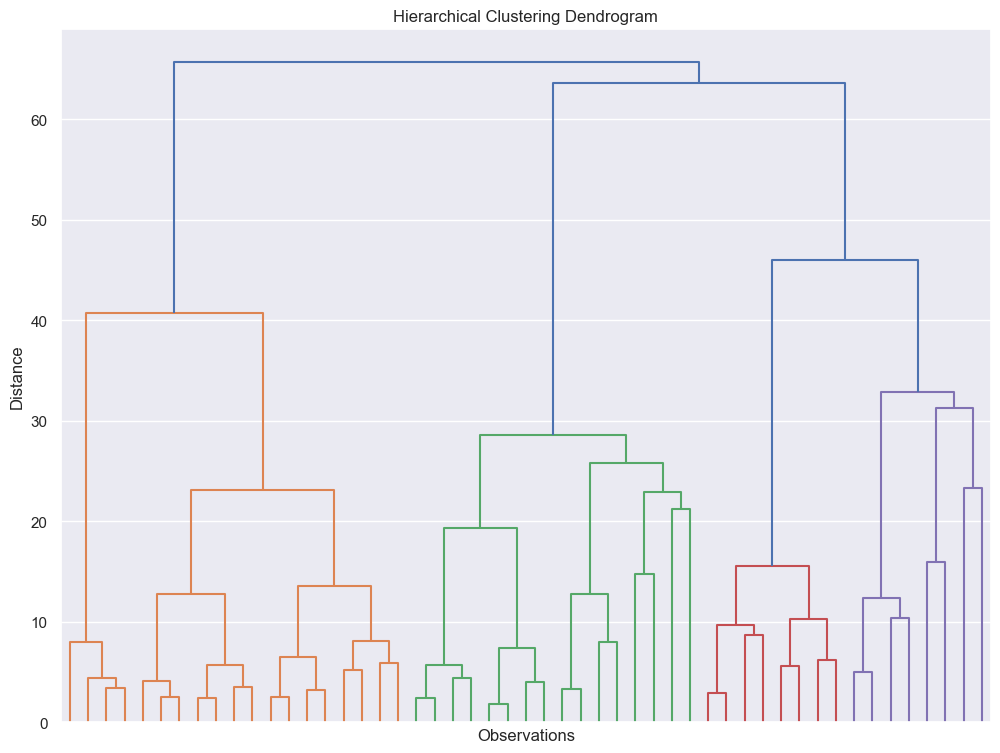

In [10]:
plt.figure(figsize=(12,9))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hier_clust, truncate_mode="level", p=5, show_leaf_counts=False, no_labels=True)
plt.show()

The result of the algorithm points to 4 separate clusters.

# K-Means Clustering

Now let's try with the K-means clustering algorithm, we'll perform an iteration with 10 steps, utilizing k-means++ as the initializer.

In [11]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init="k-means++",
                    random_state=42)

    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

Plot the results to see if the elbow can be spotted:

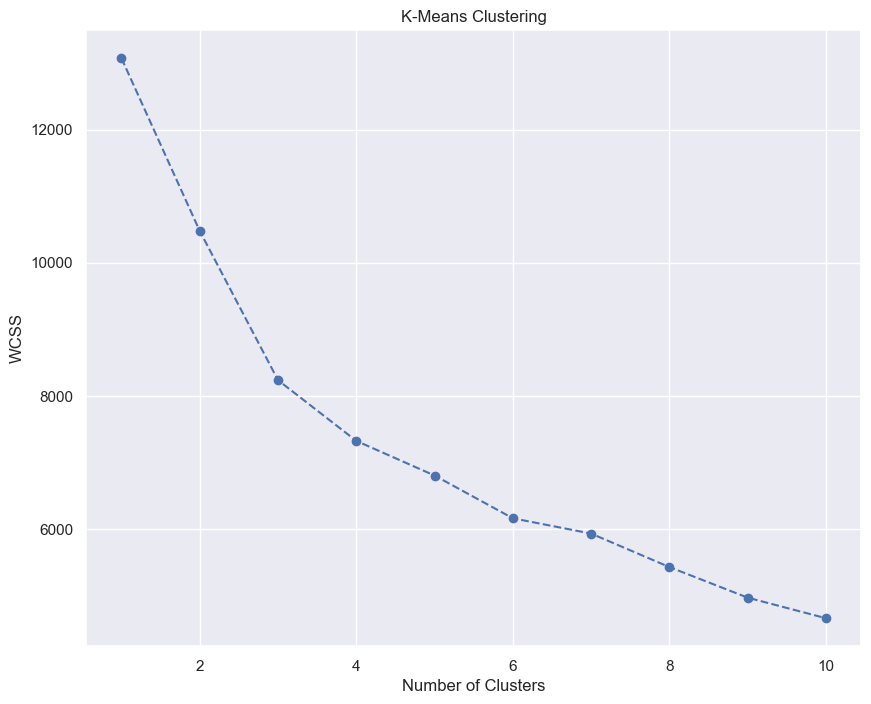

In [12]:
plt.figure(figsize=(10,8))
plt.plot(range(1, 11), wcss, marker="o", linestyle="--")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("K-Means Clustering")
plt.show()

The elbow is around **k = 3** (or 4). The drop in WCSS is steep from 1 to 3 and then flattens; gains beyond 4 are small.

Since both methods lead to around 4 clusters, this is the number we will use looking forward.